### Next Steps:
## All Dimensions:
#### - step detection von elisa, alt.: end_index detection
#### - additional parameter (create class parameter?)
#### - how to add angles/parameters to steps
#### - export single bodyparts as one dataframe for neurokin

## 2D:
#### - Front Thresholds
#### - length of gait event?

## 3D:
#### - add latest changes in 2D

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget

# Walkthrough 2D

In [1]:
from gait3d.gaitanalysis import Recording2D
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
bot = Recording2D(filepath=Path("test_data/196_F7-27_220826_OTT_Bottom_synchronizedDLC_resnet152_OT_BottomCam_finalSep20shuffle1_550000filtered.h5"), recorded_framerate=30)
bot.metadata

{'recording_date': '220826',
 'animal': '196_F7-27',
 'paradigm': 'OTT',
 'cam': 'Bottom'}

In [3]:
bot.run(intrinsic_camera_calibration_filepath="test_data/intrinsic_camera_calibrations/Bottom_checkerboard_intrinsic_calibration_results.p", 
        xy_offset=(136, 452), 
        video_filepath='test_data/196_F7-27_220826_OTT_Bottom_synchronizedDLC_resnet152_OT_BottomCam_finalSep20shuffle1_550000_filtered_labeled.mp4')
#bot.bodyparts['Back'].df.head()

In [4]:
bot.bodyparts['Snout'].df.head()

,x,y,likelihood,speed_cm_per_s,rolling_speed_cm_per_s,immobility
0,5.619031,4.285742,0.016219,NaN,NaN,False
1,5.372964,1.488374,0.016667,84.245070,28.606562,False
2,5.346844,1.485835,0.009618,0.787308,21.526548,False
3,5.372964,1.488374,0.010461,0.787308,17.242986,False
4,5.382476,1.487521,0.007757,0.286507,0.795317,True


In [5]:
bot.tracking_performance[('HindPawRight')]

over_total_session    0.967119
over_gait_events      0.967119
Name: HindPawRight, dtype: float64

In [6]:
bot.get_freezing_bouts()

In [7]:
bot.run_gait_analysis()

In [8]:
bot.immobility_bout_df

,start_index,facing_towards_open_end,freezing_threshold_reached,duration_in_s,x_position
0,42,False,True,1.166667,3.183418
1,1061,False,False,0.933333,3.725292
2,2145,False,True,4.700000,3.234040
3,2279,False,False,0.233333,3.090233
4,2646,False,False,0.433333,3.077102
...,...,...,...,...,...
70,16171,False,False,0.300000,3.546338
71,16492,False,False,0.400000,3.810574
72,16511,False,False,0.300000,3.694050
73,16627,False,False,0.400000,3.681753


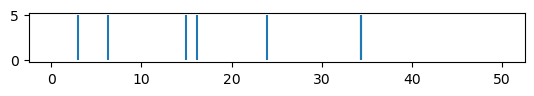

number events:  7


In [9]:
import matplotlib.pyplot as plt
plt.close()
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)

i = 0
for event in bot.gait_disruption_bouts.events:
    if event.facing_towards_open_end:
        plt.vlines(event.x_position, 0, 5, alpha=1)
        i += 1
plt.show()
print('number events: ', i)
#bot.turns_to_closed_after_gait

75


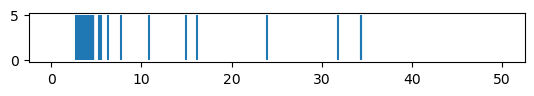

In [10]:
plt.close()
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)
for bout in bot.immobility_bouts.events:
    plt.vlines(bout.dict['x_position'], 0, 5, alpha=1)
print(len(bot.immobility_bouts.events))
plt.show()

### Walkthrough 3D

In [ ]:
from gait3d.gaitanalysis3d import Recording3D

In [ ]:
rec = Recording3D(filepath = "196_F7-27_220826_OTT.csv", recorded_framerate = 30)
rec.metadata

In [ ]:
import numpy as np
sum([np.NaN, 3, 6])/3

In [ ]:
rec.run()
rec.bodyparts["TailBase"].df.head()

In [ ]:
rec.get_freezing_bouts()
rec.freezing_bouts

In [ ]:
rec.run_gait_analysis()

In [ ]:
plt.close()
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)


for event in rec.turns_to_closed_after_gait:
    #if event.facing_towards_open_end:
    plt.vlines(event.x_position, 0, 5, alpha=0.5)
plt.show()

In [ ]:
rec.tracking_stability[['IliacCrestRight', 'HipRight', 'HindKneeRight', 'BackAngleRight', 'HindPawRight']]

In [ ]:
rec.tracking_stability[['IliacCrestLeft', 'HipLeft', 'HindKneeLeft', 'BackAnkleLeft', 'HindPawLeft']]

In [ ]:
rec.tracking_stability[['ShoulderRight', 'ElbowRight', 'WristRight', 'ForePawRight']]

In [ ]:
rec.tracking_stability[['ShoulderLeft', 'ElbowLeft', 'WristLeft', 'ForePawLeft']]

# To be implemented

In [ ]:
# 3D visualization
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Polygon, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.path as mpath
import matplotlib.patches as mpatches

def plot_frames_3d(index, bodyparts, paradigm=None):
    plt.close()
    scheme = [["TailBase", "TailQuarterAnt", "TaiMiddle", "TailQuarterPost", "TailEnd"]]
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    for bodypart in bodyparts.values():
        if bodypart.id not in set(['LED5', 'MazeCornerOpenRight', 'MazeCornerOpenLeft', 'MazeCornerClosedRight', 'MazeCornerClosedLeft']):
            if not math.isnan(bodypart.df.loc[index, 'x']):
                ax.text(bodypart.df.loc[index, 'x'], bodypart.df.loc[index, 'y'], bodypart.df.loc[index, 'z'], bodypart.id, size = 7)
                ax.scatter(bodypart.df.loc[index, 'x'], bodypart.df.loc[index, 'y'], bodypart.df.loc[index, 'z'], s=100, alpha = 1)
    connect_skeleton(scheme)
    ax.scatter([-25, -25, 55, 55, -25, -25, 55, 55], [-25, 55, 55, -25, -25, 55, 55, -25], [-25, -25, -25, -25, 55, 55, 55, 55], s=100, c='white', alpha=0)
    # the line above fixes axes
    
    if paradigm == 'OTR':
        sideright = Rectangle((0, 0), 35, 30, color='red', alpha=0.4)
        sideleft = Rectangle((0, 0), 35, 30, color='red', alpha=0.4)
        
    if paradigm == 'OTT':
        sideright = Polygon(np.array([[0, 0], [0, 30], [30, 0]]), closed=True, color='red', alpha=0.4)
        sideleft = Polygon(np.array([[0, 0], [0, 30], [30, 0]]), closed=True, color='red', alpha=0.4)
    
    if paradigm == 'OTE':
        Path = mpath.Path
        path_data = [
        (Path.MOVETO, (0, 0)),
        (Path.LINETO, (0, 30)),
        #(Path.CURVE3, (1.3, 27)),
        (Path.CURVE4, (13, 11.0)),
        (Path.CURVE4, (33.8, 2.1)), 
        (Path.CURVE4, (35, 1)),
        (Path.LINETO, (35, 0)),
        (Path.LINETO, (0, 0))]
        codes, verts = zip(*path_data)
        path = mpath.Path(verts, codes)
        sideright = mpatches.PathPatch(path, color='red', fill=True, alpha=0.4)
        sideleft = mpatches.PathPatch(path, color='red', fill=True, alpha=0.4)
    
    if paradigm != None:
        ax.add_patch(sideright)
        art3d.pathpatch_2d_to_3d(sideright, z=0, zdir='y')
        ax.add_patch(sideleft)
        art3d.pathpatch_2d_to_3d(sideleft, z=5, zdir='y')
        
        base = Rectangle((0, 0), 50, 5, color='gray', alpha=0.1)
        ax.add_patch(base)
        art3d.pathpatch_2d_to_3d(base, z=0, zdir='z')
        sideback = Rectangle((0, 0), 5, 30, color='gray', alpha=1)
        ax.add_patch(sideback)
        art3d.pathpatch_2d_to_3d(sideback, z=0, zdir='x')


    #https://stackoverflow.com/questions/35355930/matplotlib-figure-to-image-as-a-numpy-array
    ax.axis('off')
    fig.tight_layout(pad=0)
    ax.margins(0)
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return frame
    
    
def connect_skeleton(scheme):
    pass

def maze_shape(paradigm: str):
    pass

In [ ]:
a = plot_frames_3d(1, rec.bodyparts, 'OTT')

In [ ]:
video = iio.get_writer('196_F7-27_220826_OTT.mp4', fps = 30)

for i in range(5700, 6700):
    frame = plot_frames_3d(i, rec.bodyparts, 'OTT')
    video.append_data(frame)
video.close()

## Proof undistort points

In [ ]:
import imageio.v3 as iio
import cv2
import pickle


In [ ]:
df = pd.read_hdf("196_F7-27_220826_OTT_Bottom_synchronizedDLC_resnet152_OT_BottomCam_finalSep20shuffle1_550000filtered.h5")
df = df.drop('scorer', axis=1)
df.columns = df.iloc[0, :]+ '_' + df.iloc[1, :]
df = df.drop([0, 1], axis=0)
df = df.reset_index()
df = df.drop('index', axis=1)
df = df.astype(float)

In [ ]:
def load_intrinsic_camera_calibration(filepath_intrinsic_calibration: Path, xy_offset: Tuple[int, int]) -> None:
    with open(filepath_intrinsic_calibration, 'rb') as io:
        intrinsic_calibration = pickle.load(io)
    adjusted_intrinsic_calibration = intrinsic_calibration.copy()
    intrinsic_calibration_video_size = intrinsic_calibration['size']
    x_offset, y_offset = xy_offset[0], xy_offset[1]
    adjusted_K = intrinsic_calibration['K'].copy()
    adjusted_K[0][2] = adjusted_K[0][2] - x_offset
    adjusted_K[1][2] = adjusted_K[1][2] - y_offset
    return adjusted_K, intrinsic_calibration['D']

In [ ]:
image=iio.imread('/Users/kobel/Downloads/196_F7-27_220826_OTT_Bottom_synchronizedDLC_resnet152_OT_BottomCam_finalSep20shuffle1_550000_filtered_labeled.mp4', index=5700)

In [ ]:
size = (image.shape[1], image.shape[0])

In [ ]:
K, D = load_intrinsic_camera_calibration('/Users/kobel/Downloads/OneDrive_3_30/Bottom_checkerboard_intrinsic_calibration_results.p', xy_offset=(136, 452))

In [ ]:
dst_list = []
for bp in ['Snout', 'TailBase', 'HindPawLeft', 'HindPawRight', 'ForePawLeft', 'ForePawRight', 'WristLeft', 'WristRight', 'TailQuarterAnt', 'TaiMiddle', 'TailQuarterPost', 'TailEnd']:
    pt = df[[bp + '_x', bp + '_y']].copy().values
    newcameramtx, _ = cv2.getOptimalNewCameraMatrix(K, D, size, 1, size)
    dst = cv2.undistortPoints(pt, K, D, None, newcameramtx)
    dst = np.squeeze(dst)
    dst_list.append(dst)

In [ ]:
plt.close()
fig, ax = plt.subplots()
ax.set_aspect('equal')
#plt.imshow(undistort_fisheye_image_for_inspection(image=image, K=K, D=D, size=size))
# issue: image is rectified, points are not -> plotting points over image makes no sense
for dst in dst_list:
    plt.scatter(dst[5700][0], dst[5700][1])
plt.show()